## Лабораторная работа 3. Обучение с учителем. Задача регрессии(Производительность электростанции (P2) )

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt 
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pickle

In [2]:
data = pd.read_csv('energy_task.csv')
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


# Исследование исходных данных


Предположительные столбцы данных
* date - дата
* Appliances - энергопотребление
* lights - энергопотребление осветительных приборов
* Tn - измерение темпиратур
* RHn - относительная влажность
* T_out -  измерение внешней температуры
* Press_mm_hg- Этот параметр представляет атмосферное давление
* RH_out - Этот параметр отражает относительную влажность внешней среды.
* Windspeed -  Параметр Windspeed отражает скорость ветра
* Visibility -  Этот параметр представляет видимость (в км).\
* Tdewpoint - Параметр Tdewpoint представляет собой точку росы (в градусах Цельсия), которая связана с влажностью и температурой.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Типы данных сфармированны верно кроме даты. Но есть пропущенные значения

In [4]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19569.000000,19735.000000,19735.000000,19735.000000,19654.000000,...,19613.000000,19735.000000,19651.000000,19732.000000,19539.000000,19607.000000,19634.000000,19735.000000,19725.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.416943,22.267611,39.242500,20.855335,39.023931,...,22.030801,42.936165,19.486594,41.553061,7.414858,755.521144,79.748120,4.039752,38.331128,3.760995
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.075261,2.006111,3.254576,2.042884,4.340201,...,1.955828,5.224361,2.015256,4.151421,5.316895,7.405769,14.900566,2.451221,11.792933,4.195248
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.890000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.900000,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.105556,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.145000,...,23.390000,46.536000,20.600000,44.343393,10.400000,760.950000,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [5]:
# Проверка на наличие пропущенных значений
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

T_out          0.993159
RH_2           0.841145
Press_mm_hg    0.648594
T8             0.618191
date           0.552318
RH_out         0.511781
RH_5           0.461110
T9             0.425640
RH_6           0.425640
RH_4           0.410438
T7             0.273626
Visibility     0.050671
RH_9           0.015201
RH_7           0.000000
Windspeed      0.000000
RH_8           0.000000
T6             0.000000
Appliances     0.000000
T5             0.000000
T4             0.000000
RH_3           0.000000
T3             0.000000
T2             0.000000
RH_1           0.000000
T1             0.000000
lights         0.000000
Tdewpoint      0.000000
dtype: float64

Так как количество строк с пропущенными значенийями мало, удалю их

In [6]:
data = data.dropna()

In [7]:
# Проверка на наличие пропущенных значений
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

date           0.0
RH_6           0.0
Visibility     0.0
Windspeed      0.0
RH_out         0.0
Press_mm_hg    0.0
T_out          0.0
RH_9           0.0
T9             0.0
RH_8           0.0
T8             0.0
RH_7           0.0
T7             0.0
T6             0.0
Appliances     0.0
RH_5           0.0
T5             0.0
RH_4           0.0
T4             0.0
RH_3           0.0
T3             0.0
RH_2           0.0
T2             0.0
RH_1           0.0
T1             0.0
lights         0.0
Tdewpoint      0.0
dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18538 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         18538 non-null  object 
 1   Appliances   18538 non-null  int64  
 2   lights       18538 non-null  int64  
 3   T1           18538 non-null  float64
 4   RH_1         18538 non-null  float64
 5   T2           18538 non-null  float64
 6   RH_2         18538 non-null  float64
 7   T3           18538 non-null  float64
 8   RH_3         18538 non-null  float64
 9   T4           18538 non-null  float64
 10  RH_4         18538 non-null  float64
 11  T5           18538 non-null  float64
 12  RH_5         18538 non-null  float64
 13  T6           18538 non-null  float64
 14  RH_6         18538 non-null  float64
 15  T7           18538 non-null  float64
 16  RH_7         18538 non-null  float64
 17  T8           18538 non-null  float64
 18  RH_8         18538 non-null  float64
 19  T9  

После  удаления пустых строк данные очистильсь и х кол-во сократилось на 6%. приемлимо.

C:\Users\dimka\AppData\Local\Temp\ipykernel_3800\3072354465.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".3f")


<AxesSubplot: >

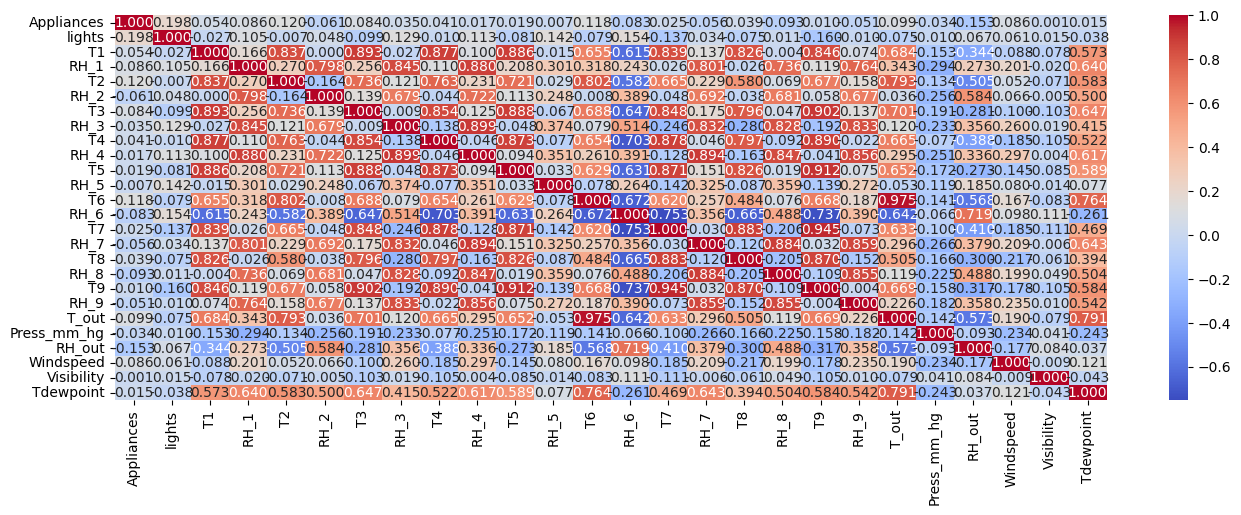

In [9]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".3f")


все параметры не связанны линейно

# Коррекция типов данных

In [10]:
data = data.drop(["date"], axis=1)

Дата не повлияет на обуение модели, а следовательно её лучше исключить

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18538 entries, 0 to 19734
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   18538 non-null  int64  
 1   lights       18538 non-null  int64  
 2   T1           18538 non-null  float64
 3   RH_1         18538 non-null  float64
 4   T2           18538 non-null  float64
 5   RH_2         18538 non-null  float64
 6   T3           18538 non-null  float64
 7   RH_3         18538 non-null  float64
 8   T4           18538 non-null  float64
 9   RH_4         18538 non-null  float64
 10  T5           18538 non-null  float64
 11  RH_5         18538 non-null  float64
 12  T6           18538 non-null  float64
 13  RH_6         18538 non-null  float64
 14  T7           18538 non-null  float64
 15  RH_7         18538 non-null  float64
 16  T8           18538 non-null  float64
 17  RH_8         18538 non-null  float64
 18  T9           18538 non-null  float64
 19  RH_9

# обработка выбросов

In [12]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,...,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000
mean,97.681519,3.776567,21.692492,40.252461,20.348018,40.411544,22.276030,39.232780,20.863236,39.019644,...,22.037364,42.922622,19.495333,41.549326,7.422572,755.512313,79.739117,4.035615,38.308498,3.768491
std,102.524416,7.918444,1.610378,3.978589,2.197493,4.074084,2.011906,3.250901,2.047060,4.338527,...,1.959022,5.223027,2.020457,4.150539,5.321531,7.412500,14.910930,2.443827,11.783314,4.200655
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.550000
25%,50.000000,0.000000,20.760000,37.333333,18.823333,37.863333,20.790000,36.900000,19.533333,35.500000,...,20.790000,39.060000,18.000000,38.500000,3.670000,750.900000,70.166667,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.633333,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.133333,42.363333,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.631250,43.060000,21.500000,43.260000,23.323333,41.760000,22.100000,42.133333,...,23.390000,46.525972,20.600000,44.326667,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,1070.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


Для уменьшения влияния выбросов на результат отбросим значения.

In [13]:
# Создать Dataframe на основе столбцов с выбросами
outlier = data[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9',
                'T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
outlier

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


In [14]:
# Определить нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1


Appliances      50.000000
lights           0.000000
T1              20.760000
RH_1            37.333333
T2              18.823333
RH_2            37.863333
T3              20.790000
RH_3            36.900000
T4              19.533333
RH_4            35.500000
T5              18.290000
RH_5            45.400000
T6               3.626667
RH_6            29.960833
T7              18.701250
RH_7            31.500000
T8              20.790000
RH_8            39.060000
T9              18.000000
RH_9            38.500000
T_out            3.670000
Press_mm_hg    750.900000
RH_out          70.166667
Windspeed        2.000000
Visibility      29.000000
Tdewpoint        0.900000
Name: 0.25, dtype: float64

In [15]:

# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

Appliances     100.000000
lights           0.000000
T1              22.631250
RH_1            43.060000
T2              21.500000
RH_2            43.260000
T3              23.323333
RH_3            41.760000
T4              22.100000
RH_4            42.133333
T5              20.633333
RH_5            53.629167
T6              11.263333
RH_6            83.199722
T7              21.600000
RH_7            39.000000
T8              23.390000
RH_8            46.525972
T9              20.600000
RH_9            44.326667
T_out           10.400000
Press_mm_hg    760.933333
RH_out          91.666667
Windspeed        5.500000
Visibility      40.000000
Tdewpoint        6.570000
Name: 0.75, dtype: float64

In [16]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
51,50,0,20.926667,45.590000,20.290000,44.290000,20.166667,45.530000,21.890000,46.966667,...,19.2900,53.500000,16.890000,46.290000,5.15,737.900000,92.000000,5.500000,40.000000,3.95
52,40,0,20.890000,45.666667,20.230000,44.290000,20.133333,45.500000,21.823333,46.226667,...,19.2900,53.960000,16.890000,46.433333,5.17,738.033333,92.000000,5.333333,40.000000,3.97
53,50,0,20.890000,46.060000,20.200000,44.400000,20.200000,45.500000,21.666667,46.060000,...,19.2900,54.463333,16.890000,46.633333,5.18,738.166667,92.000000,5.166667,40.000000,3.98
54,40,0,20.790000,46.200000,20.200000,44.466667,20.166667,45.500000,21.533333,45.933333,...,19.2225,54.722500,16.890000,46.826667,5.20,738.300000,92.000000,5.000000,40.000000,4.00
55,50,0,20.790000,46.200000,20.100000,44.530000,20.125000,45.425000,21.356667,45.900000,...,19.2000,54.966667,16.963333,46.966667,5.13,738.400000,92.000000,4.833333,40.000000,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19666,50,0,24.000000,45.560000,22.277143,46.608571,26.100000,39.700000,24.290000,42.560000,...,24.1000,48.860000,22.790000,47.133333,13.40,755.700000,89.000000,1.333333,47.333333,11.60
19668,50,0,24.000000,45.400000,22.361429,46.428571,25.926667,39.530000,24.290000,42.590000,...,24.1000,48.433333,22.790000,46.745000,13.50,755.800000,89.000000,1.000000,48.000000,11.70
19670,60,0,24.000000,45.490000,22.390000,46.290000,25.790000,39.433333,24.290000,42.700000,...,24.0000,48.030000,22.790000,46.500000,13.70,755.800000,88.000000,1.333333,50.333333,11.70
19672,130,0,23.963333,45.500000,22.390000,46.290000,25.730000,39.700000,24.290000,42.700000,...,24.0000,47.863333,22.790000,46.326667,13.90,755.800000,87.000000,1.666667,52.666667,11.70


In [17]:
# Копирование индексов
index_list = list(data_filtered.index.values)

In [18]:
# Хранить данные без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,9880.000000,9880.0,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,...,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000
mean,62.145749,0.0,21.666124,39.860074,20.149760,40.491326,22.316300,38.917678,20.876560,38.640911,...,22.077586,42.808106,19.654814,41.525988,7.282930,755.621009,79.751045,4.012388,35.234455,3.716393
std,25.309723,0.0,1.466865,3.568169,1.846826,3.801675,1.815741,3.051637,1.897957,4.088099,...,1.921147,4.995037,1.899712,4.013811,4.555226,6.831333,13.656360,2.356219,8.140183,3.946134
min,10.000000,0.0,17.963333,31.426667,16.200000,29.967143,17.790000,29.800000,15.690000,29.727143,...,16.890000,29.600000,14.890000,29.850000,-4.920000,735.933333,38.000000,0.000000,12.666667,-6.500000
25%,50.000000,0.0,20.790000,37.200000,18.790000,37.790000,20.890000,36.728929,19.600000,35.290000,...,20.890000,39.172861,18.200000,38.700000,4.047500,751.050000,70.625000,2.000000,28.166667,1.100000
50%,60.000000,0.0,21.600000,39.363333,19.890000,40.431667,22.290000,38.290000,20.666667,38.200000,...,22.200000,42.214222,19.600000,40.900000,7.070000,756.100000,83.000000,3.666667,40.000000,3.470000
75%,70.000000,0.0,22.566667,42.230000,21.330714,43.290000,23.290000,40.636250,22.100000,41.290000,...,23.426667,46.066667,20.700000,44.090000,10.200000,760.700000,91.000000,5.500000,40.000000,6.200000
max,170.000000,0.0,25.390000,51.433455,25.500000,51.200000,27.116545,47.390000,25.926667,49.726667,...,26.956000,56.851111,24.390000,52.700000,20.400000,772.266667,100.000000,10.666667,56.500000,14.900000


На данный момент мы провел очистку анализ и очистку данных. Можем приступат к дальнейшей работе.

### Первый шаг: выделение целевого признака и предикторов

# Функции

In [19]:
def MAE(y_test, y_pred):
  return  abs(y_test-y_pred).mean()

In [20]:
def MSE(y_test, y_pred):
  return  ((y_test-y_pred)**2).mean()

In [21]:
def RMSE(y_test, y_pred):
  return  sqrt( MSE(y_test,y_pred) )

In [22]:
def MAPE(y_test, y_pred):
  return  ( abs(y_test-y_pred) / abs(y_test) ).mean()

In [23]:
def R2(y_test, y_pred):
  return  1 - MSE(y_test, y_pred)/ ((y_test- y_test.mean())**2).mean()

Наиши целивым признаком будет столбец электро эффективности Appliances. Его мы будем прогнзировать на основе ругих 25 предыкатов.

### Обучение модели

# простая регрессия

In [24]:
lm = LinearRegression()
lm

LinearRegression()

In [25]:
# Определение переменных X и переменной Y.
# Учитывая тест Пирсона, лучшая переменная для разработки простой линейной регрессии — «Длина3» ('Length3')
X_l = data[['lights']]
y_l = data[['Appliances']]

X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_l_train)

X_l_train = scaler.transform(X_l_train)
X_l_test = scaler.transform(X_l_test)

lm.fit(X_l_train,y_l_train)

LinearRegression()

<AxesSubplot: ylabel='Appliances'>

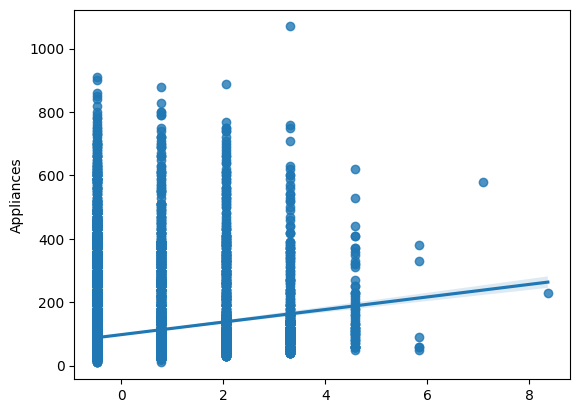

In [26]:
# seaborn для графика Linear Regression model
import seaborn as sns
sns.regplot(x = X_l_train, y = y_l_train)

In [27]:
# получаем предсказания для тестовой выборки
y_l_pred = lm.predict(X_l_test)

In [28]:
print(f'MAE: {mean_absolute_error(y_l_test, y_l_pred)}')
print(f'MSE: {mean_squared_error(y_l_test, y_l_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_l_test, y_l_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_l_test, y_l_pred))}')
print(f'R^2: {lm.score(X_l_test, y_l_test)}')

MAE: 57.2894442208986
MSE: 9446.957279561246
RMSE: 97.19545915093589
MAPE: 0.8447649134450089
R^2: 0.04880410021683523


In [29]:
# L1
ridge_l = Ridge(alpha=0.9).fit(X_l_train, y_l_train)
y_l_pred = ridge_l.predict(X_l_test)
print(f'MAE: {mean_absolute_error(y_l_test, y_l_pred)}')
print(f'MSE: {mean_squared_error(y_l_test, y_l_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_l_test, y_l_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_l_test, y_l_pred))}')
print(f'R^2: {ridge_l.score(X_l_test, y_l_test)}')

MAE: 57.28945332726807
MSE: 9446.962942006408
RMSE: 97.19548828009667
MAPE: 0.8447660499577462
R^2: 0.04880353007615801


In [30]:
# L2
lasso_l = Lasso(alpha=0.9).fit(X_l_train, y_l_train)
y_pred = lasso_l.predict(X_l_test)
print(f'MAE: {mean_absolute_error(y_l_test, y_l_pred)}')
print(f'MSE: {mean_squared_error(y_l_test, y_l_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_l_test, y_l_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_l_test, y_l_pred))}')
print(f'R^2: {ridge_l.score(X_l_test, y_l_test)}')

MAE: 57.28945332726807
MSE: 9446.962942006408
RMSE: 97.19548828009667
MAPE: 0.8447660499577462
R^2: 0.04880353007615801


# множественная регрессия

### Разделение на обучающуюся и тренеровачную выборку

In [31]:
y = data_filtered["Appliances"]
X = data_filtered.drop(["Appliances"], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7904, 25), (7904,), (1976, 25), (1976,))

In [34]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# это обучение модели (на обучающей выборке)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
# а это получение предсказания (предскажем для всех тестовой выборки)
lr.predict(X_test)

array([69.38553783, 90.96277471, 72.6582664 , ..., 53.53187614,
       48.39065896, 73.27147112])

In [37]:
# получаем предсказания для тестовой выборки
y_pred = lr.predict(X_test)

In [38]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 15.561630692121796
MSE: 466.98429288219063
RMSE: 21.609819362553466
MAPE: 0.5326647435926705
R^2: 0.293245496370355


Теперь попробуем применить регуляризации.


In [39]:
# L1
ridge = Ridge(alpha=0.9).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 15.562657972847905
MSE: 467.00880560837453
RMSE: 21.610386521494114
MAPE: 0.5326835980313153
R^2: 0.29320839773579543


array([  0.        ,   7.43338917,  21.62845856,  -9.26309949,
       -13.20314087,   2.80315138,  -4.7267829 ,   1.06377766,
         2.76671858,  -0.05764015,  -0.53892896,   8.66933542,
         1.26348729,  -8.89488133,   4.23819348,  17.30083523,
       -10.30107749,  -9.57967416,  -5.30600022,   6.50814143,
        -0.49267315,   6.00086568,   2.19784826,  -0.68177968,
       -10.86436859])

In [40]:
# L2
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 15.649921758943538
MSE: 472.87609139076767
RMSE: 21.745714322384714
MAPE: 0.5339415854633158
R^2: 0.28432859018339307


array([ 0.        ,  1.99485151, 14.19919506, -0.05467315, -5.03473676,
        1.48714921, -2.8290279 , -0.        ,  0.46150161, -0.        ,
       -0.38397355,  3.8679952 ,  0.4821732 , -6.93263731,  1.78404551,
       15.78957932, -8.91243873, -9.31564211, -5.03210047, -0.        ,
       -0.63301628,  0.        ,  1.96849834, -0.44389928, -1.02017202])

Подберём гиперпараметр с помощью библиотеки

In [41]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [42]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

Пайплайн

In [43]:
y_polF = data_filtered["Appliances"]
X_polF = data_filtered.drop(["Appliances"], axis=1)

Input = [('standardscaler', StandardScaler()),
         ('classifier', LinearRegression())]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('classifier', LinearRegression())])

In [44]:
pipe.fit(X_polF, y_polF)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('classifier', LinearRegression())])

In [45]:
Yhat_pipe = pipe.predict(X_polF)
Yhat_pipe[0:4]

array([54.90962829, 53.37198062, 53.71546579, 51.82968453])

In [46]:
print("Mean Squared Error для линейной регрессии = ",
      mean_squared_error(y_polF, Yhat_pipe), ' R^2 = ', r2_score(y_polF, Yhat_pipe))

Mean Squared Error для линейной регрессии =  441.16716049881717  R^2 =  0.31123294180082894


# Полинамиальная регрессия 

In [47]:
y_pol = data_filtered["Appliances"]
X_pol = data_filtered.drop(["Appliances"], axis=1)

In [48]:
# создаем объект, который позволит расширить множество предикторов
pf = PolynomialFeatures(4)
# добавляем новые предикторы
X_p = pf.fit_transform(X_pol)
X_p

array([[1.00000000e+00, 0.00000000e+00, 2.09266667e+01, ...,
        2.49640000e+04, 2.46519500e+03, 2.43438006e+02],
       [1.00000000e+00, 0.00000000e+00, 2.08900000e+01, ...,
        2.52174400e+04, 2.50283092e+03, 2.48405969e+02],
       [1.00000000e+00, 0.00000000e+00, 2.08900000e+01, ...,
        2.53446400e+04, 2.52179168e+03, 2.50918272e+02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 2.40000000e+01, ...,
        3.46803210e+05, 8.06145210e+04, 1.87388721e+04],
       [1.00000000e+00, 0.00000000e+00, 2.39633333e+01, ...,
        3.79702440e+05, 8.43516180e+04, 1.87388721e+04],
       [1.00000000e+00, 0.00000000e+00, 2.38566667e+01, ...,
        4.36656640e+05, 9.20097920e+04, 1.93877776e+04]])

In [49]:
X_p_train, X_p_test, y_pol_train, y_pol_test = train_test_split(X_p, y_pol, test_size=0.2)

In [50]:
X_p_train.shape, y_pol_train.shape, X_p_test.shape, y_pol_test.shape

((7904, 23751), (7904,), (1976, 23751), (1976,))

In [51]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
lr_p = LinearRegression().fit(X_p, y_pol)
lr_p.coef_

array([  1.30645025,  -0.77728708,  -0.85477846, ...,  35.85586137,
       -16.77549565,  16.98337041])

сериализация

In [53]:
with open("Polynom.pickle", "wb") as file:
    pickle.dump(lr_p, file)

In [54]:
y_p_pred = lr_p.predict(X_p_test)

In [55]:
print(f'MAE: {mean_absolute_error(y_pol_test, y_p_pred)}')
print(f'MSE: {mean_squared_error(y_pol_test, y_p_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_pol_test, y_p_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_pol_test, y_p_pred))}')
print(f'R^2: {lr_p.score(X_p_test, y_pol_test)}')

MAE: 0.006603584696467106
MSE: 7.895686050361e-05
RMSE: 0.008885767299654544
MAPE: 0.011328868578391745
R^2: 0.9999998775997778


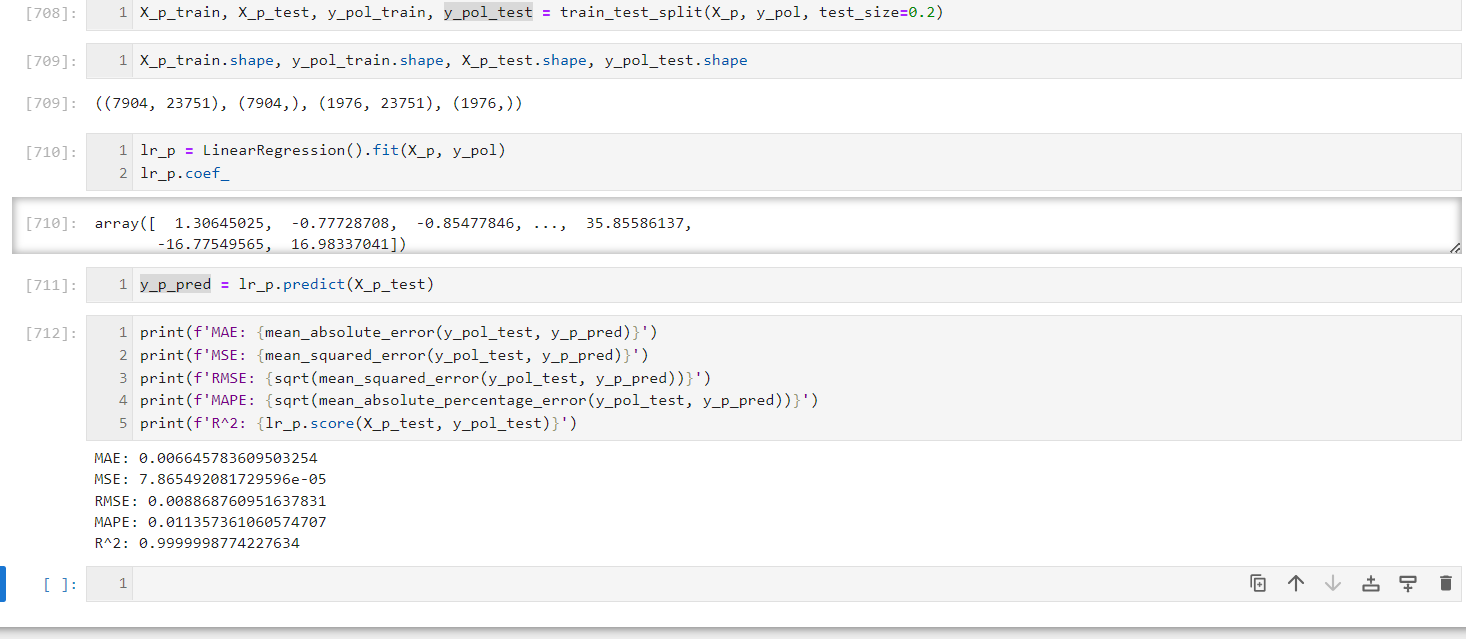

Первоначально, для полинамиальной регрессии со степенью 2 и точность была равна 0.5, далее я взял палном 3 степени, точность возросла до 0.83, но на этом я не отоновился, после длительной кампиляции полином 4й степени дал точность в 0.99

для полинамиальной регрессии незачем устанавливать  регуляризацию, так-как мы и так достигли каласальной точности.
Да и  регуляризация заняла бы слишком много времени.

# ElasticNet

In [56]:
base_elastic_model = ElasticNet(max_iter=100000)

In [57]:
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [58]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)

In [59]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [60]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [61]:
y_e_pred = grid_model.predict(X_test)

In [62]:
print(f'MAE: {mean_absolute_error(y_test, y_e_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_e_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_e_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_e_pred))}')
print(f'R^2: {round(r2_score(y_test, y_e_pred),2)}')

MAE: 15.649921758943536
MSE: 472.87609139076756
RMSE: 21.74571432238471
MAPE: 0.5339415854633158
R^2: 0.28


# Aнализ моделей

как мы видим, полинамиальная модель дала наибольший результат(0.99), по сравнению со всеми другими, множественная регрессия(0.32), эластик нет (0.33).
Из этого слеует что данные у нас не линейны, что подтверждает график.


<AxesSubplot: >

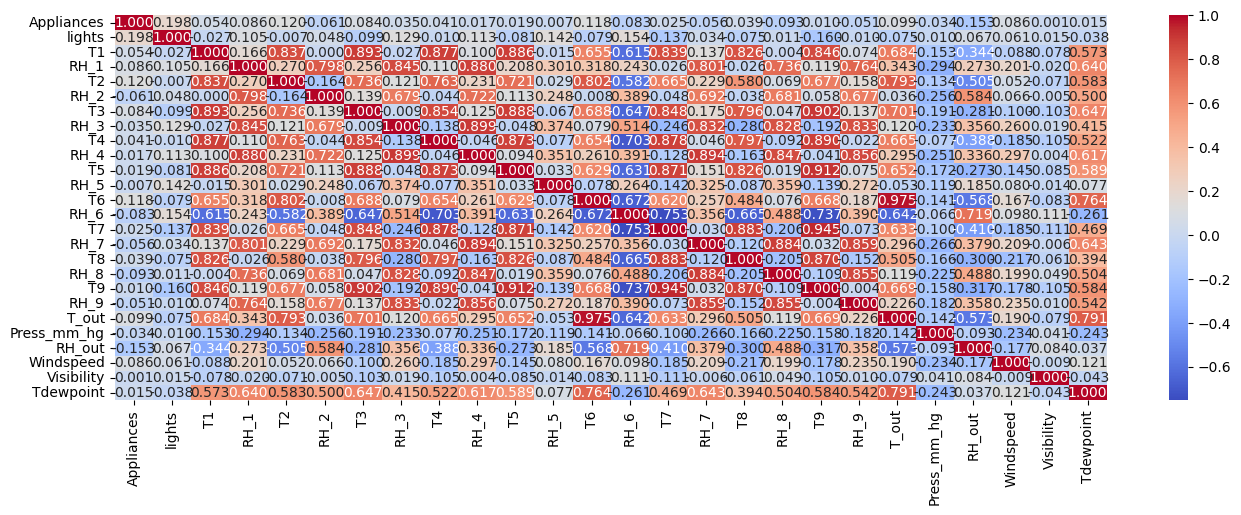

In [63]:
#sns.boxplot(data=df,x="price")
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".3f")
#df.corr()

# Подводя итоги, были реализованны модели с регуляризацией, прописанны функции, найдена лучшай модель(полинамиальная)